In [20]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from scipy.stats import pearsonr, spearmanr
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


In [103]:
# Load .env from the current directory or specified path
dotenv_path = Path("/Users/pourya/IdeaProjects/DiffBenchmark/.env")
if load_dotenv(dotenv_path):
    print(f"✅ Loaded environment variables from {dotenv_path}")
else:
    print(f"⚠️ Warning: Failed to load .env from {dotenv_path}")

# Ensure required environment variables exist
required_vars = ["DB_NAME", "DB_USERNAME", "DB_PASSWORD"]
missing = [var for var in required_vars if not os.getenv(var)]
if missing:
    raise ValueError(f"Missing required environment variables: {missing}")

# Database connection settings from environment variables
db_config = {
    'dbname': os.getenv('DB_NAME'),
    'user': os.getenv('DB_USERNAME'),
    'password': os.getenv('DB_PASSWORD'),
    'host': os.getenv('DB_HOST', 'localhost'),
    'port': os.getenv('DB_PORT', '5432')
}

# SQLAlchemy connection string
conn_str = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"
engine = create_engine(conn_str)

# Table name
data_table_name = 'intel'
info_table_name = 'info'

✅ Loaded environment variables from /Users/pourya/IdeaProjects/DiffBenchmark/.env


In [115]:
try:
    df = pd.read_sql(f'SELECT * FROM {data_table_name}', engine)
    infos = pd.read_sql(f'Select * from {info_table_name}', engine)
    #rename the column file to srcPath in infos table
    infos = infos.rename(columns={'file': 'srcpath'})
except Exception as e:
    print(f"❌ Error: {e}")

In [117]:
df[['precision', 'recall', 'f1']] = df[['precision', 'recall', 'f1']].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['precision', 'recall', 'f1'])
df_original = df


In [118]:
df

,id,commit,conf,f1,fn_mappings,fn_programelements,fp_mappings,fp_programelements,matcher,n_sum,...,repo,s,srcpath,tp_mappings,tp_programelements,tp_raw_mappings,tp_raw_programelements,trv_mappings,trv_programelements,dataset
0,1,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=4}",0.779661,6,1,5,1,SimpleGumtree,51,...,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26,None
1,2,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=1}",0.800000,5,1,5,1,SimpleGumtree,50,...,https://github.com/deeplearning4j/deeplearning...,8,deeplearning4j-core/src/main/java/org/deeplear...,22,2,238,28,216,26,None
2,3,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=height, st_minprio=3}",0.615385,12,2,5,1,SimpleGumtree,73,...,https://github.com/deeplearning4j/deeplearning...,7,deeplearning4j-core/src/main/java/org/deeplear...,15,1,231,27,216,26,None
3,4,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=height, st_minprio=2}",0.779661,6,1,5,1,SimpleGumtree,51,...,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26,None
4,5,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=3}",0.779661,6,1,5,1,SimpleGumtree,51,...,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629845,629846,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=3, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25,None
629846,629847,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=4, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25,None
629847,629848,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=height, st_minprio=4, bu_minsize=...",0.946108,6,0,3,0,HybridGumtree,88,...,https://github.com/apache/pig.git,22,src/org/apache/pig/backend/hadoop/executioneng...,75,4,467,29,392,25,None
629848,629849,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=5, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25,None


In [119]:
df = df.merge(infos[['commit', 'srcpath', 'interfilers']], on=['commit', 'srcpath'], how='left')

# Remove rows where 'inter-files' is True
df = df[df['interfilers'] != True]

# Drop 'inter-files' column if you don't need it anymore
df = df.drop(columns=['interfilers'])

In [120]:
df

,id,commit,conf,f1,fn_mappings,fn_programelements,fp_mappings,fp_programelements,matcher,n_sum,...,repo,s,srcpath,tp_mappings,tp_programelements,tp_raw_mappings,tp_raw_programelements,trv_mappings,trv_programelements,dataset
0,1,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=4}",0.779661,6,1,5,1,SimpleGumtree,51,...,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26,None
1,2,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=1}",0.800000,5,1,5,1,SimpleGumtree,50,...,https://github.com/deeplearning4j/deeplearning...,8,deeplearning4j-core/src/main/java/org/deeplear...,22,2,238,28,216,26,None
2,3,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=height, st_minprio=3}",0.615385,12,2,5,1,SimpleGumtree,73,...,https://github.com/deeplearning4j/deeplearning...,7,deeplearning4j-core/src/main/java/org/deeplear...,15,1,231,27,216,26,None
3,4,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=height, st_minprio=2}",0.779661,6,1,5,1,SimpleGumtree,51,...,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26,None
4,5,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=3}",0.779661,6,1,5,1,SimpleGumtree,51,...,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614252,629846,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=3, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25,None
614253,629847,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=4, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25,None
614254,629848,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=height, st_minprio=4, bu_minsize=...",0.946108,6,0,3,0,HybridGumtree,88,...,https://github.com/apache/pig.git,22,src/org/apache/pig/backend/hadoop/executioneng...,75,4,467,29,392,25,None
614255,629849,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=5, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25,None


In [78]:
# edSizeColumnName = 'edSize'
# df[('%s' % edSizeColumnName)] = df['ni'] + df['nd'] + df['nu'] + df['nm']
#
# grouped = df.groupby(['commit', 'srcpath'])[edSizeColumnName].agg(['min', 'max']).reset_index()
# grouped = grouped.rename(columns={'min': 'min_X', 'max': 'max_X'})
# df = df.merge(grouped, on=['commit', 'srcpath'], how='left')
# df['score'] = (df['max_X'] - df[edSizeColumnName]) / (df['max_X'] - df['min_X'])
#
#
# df[['score']] = df[['score']].replace([np.inf, -np.inf], np.nan)
# df = df.dropna(subset=['score'])

In [109]:
df = df[['commit', 'srcpath', 'conf', 'matcher', 'precision', 'recall', 'f1']]

#print number of rows in df
print(df.shape[0])

513026


In [114]:
df

,commit,srcpath,conf,matcher,precision,recall,f1
0,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=size, st_minprio=4}",SimpleGumtree,0.793103,0.766667,0.779661
1,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=size, st_minprio=1}",SimpleGumtree,0.800000,0.800000,0.800000
2,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=height, st_minprio=3}",SimpleGumtree,0.727273,0.533333,0.615385
3,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=height, st_minprio=2}",SimpleGumtree,0.793103,0.766667,0.779661
4,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=size, st_minprio=3}",SimpleGumtree,0.793103,0.766667,0.779661
...,...,...,...,...,...,...,...
614252,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=size, st_minprio=3, bu_minsize=2000}",HybridGumtree,0.975904,0.952941,0.964286
614253,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=size, st_minprio=4, bu_minsize=2000}",HybridGumtree,0.975904,0.952941,0.964286
614254,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=height, st_minprio=4, bu_minsize=...",HybridGumtree,0.963415,0.929412,0.946108
614255,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=size, st_minprio=5, bu_minsize=2000}",HybridGumtree,0.975904,0.952941,0.964286


In [90]:
#  # Assuming df is your DataFrame
# pearson_precision = pearsonr(df['score'], df['precision'])
# pearson_recall = pearsonr(df['score'], df['recall'])
#
# spearman_precision = spearmanr(df['score'], df['precision'])
# spearman_recall = spearmanr(df['score'], df['recall'])
#
#


In [47]:
print(pearson_precision)
print(pearson_recall)
print(spearman_precision)
print(spearman_recall)

PearsonRResult(statistic=np.float64(0.058380002590160004), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.4323509528393568), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.20897485542819333), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.6273750541807672), pvalue=np.float64(0.0))


In [112]:
corr = df[['score', 'precision', 'recall']].corr()

# Slice to only include score correlations
corr_subset = corr.loc[['score'], ['precision', 'recall']]

# Plot heatmap
plt.figure(figsize=(6, 2))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation of Score with Precision and Recall')
plt.show()

KeyError: "['score'] not in index"

/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_18263/2531944331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['precision_bin'] = pd.cut(filtered_df['precision'], bins, labels=bins[:-1])
/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_18263/2531944331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['recall_bin'] = pd.cut(filtered_df['recall'], bins, labels=bins[:-1])
/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_18263/2531944331.py:9: Futu

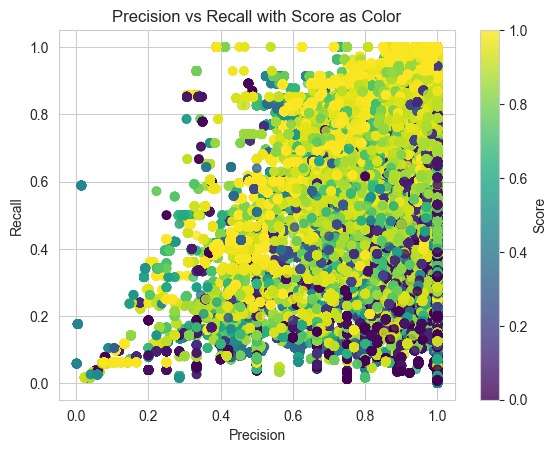

In [49]:
filtered_df = df[['score', 'precision', 'recall']]
bins = np.linspace(0, 1, 50)  # 50 evenly spaced bins from 0 to 1

# Bin precision and recall values
filtered_df['precision_bin'] = pd.cut(filtered_df['precision'], bins, labels=bins[:-1])
filtered_df['recall_bin'] = pd.cut(filtered_df['recall'], bins, labels=bins[:-1])

# Create a pivot table for the heatmap
heatmap_data = filtered_df.pivot_table(index='recall_bin', columns='precision_bin', values='score', aggfunc='mean')

# Plot the heatmap


# Create a scatter plot with precision on x-axis, recall on y-axis, and score as color
scatter = plt.scatter(filtered_df['precision'], filtered_df['recall'],
                      c=filtered_df['score'], cmap='viridis', alpha=0.8)

# Add a color bar to show the mapping of colors to score values
plt.colorbar(scatter, label='Score')

# Labels and title
plt.title('Precision vs Recall with Score as Color')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_18263/3678520985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=score_corr.index, y=score_corr.values, palette='Blues_d')


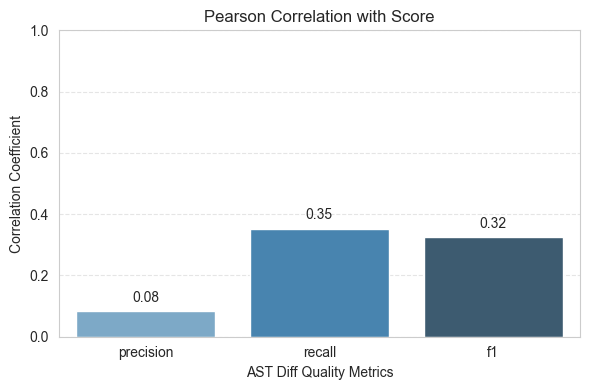

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr_matrix = df[['score', 'precision', 'recall', 'f1']].corr()

# Extract only score correlations with others (drop self-correlation)
score_corr = corr_matrix['score'].drop('score')

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=score_corr.index, y=score_corr.values, palette='Blues_d')
plt.ylim(0, 1)
plt.title('Pearson Correlation with Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('AST Diff Quality Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [70]:
df.shape

(500066, 7)

In [71]:
import pandas as pd

# Assuming your DataFrame is named df and has the following columns:
# ['commit', 'srcpath', 'conf', 'score', 'precision', 'recall', 'f1']

# ----- Highest Precision per (commit, srcpath) -----
best_by_precision = (
    df.sort_values('precision', ascending=False)
    .groupby(['commit', 'srcpath'])
    .first()
    .reset_index()
)

avg_prec_precision = best_by_precision['precision'].mean()
avg_rec_precision = best_by_precision['recall'].mean()
avg_f1_precision = best_by_precision['f1'].mean()


# ----- Highest Recall per (commit, srcpath) -----
best_by_recall = (
    df.sort_values('recall', ascending=False)
    .groupby(['commit', 'srcpath'])
    .first()
    .reset_index()
)

avg_prec_recall = best_by_recall['precision'].mean()
avg_rec_recall = best_by_recall['recall'].mean()
avg_f1_recall = best_by_recall['f1'].mean()


# ----- Highest F1 per (commit, srcpath) -----
best_by_f1 = (
    df.sort_values('f1', ascending=False)
    .groupby(['commit', 'srcpath'])
    .first()
    .reset_index()
)

avg_prec_f1 = best_by_f1['precision'].mean()
avg_rec_f1 = best_by_f1['recall'].mean()
avg_f1_f1 = best_by_f1['f1'].mean()


# ----- Print Summary -----
print("=== Average Scores by Selection Strategy ===")
print("\n[Selected by Highest Precision]")
print(f"Precision: {avg_prec_precision:.4f}")
print(f"Recall:    {avg_rec_precision:.4f}")
print(f"F1 Score:  {avg_f1_precision:.4f}")

print("\n[Selected by Highest Recall]")
print(f"Precision: {avg_prec_recall:.4f}")
print(f"Recall:    {avg_rec_recall:.4f}")
print(f"F1 Score:  {avg_f1_recall:.4f}")

print("\n[Selected by Highest F1 Score]")
print(f"Precision: {avg_prec_f1:.4f}")
print(f"Recall:    {avg_rec_f1:.4f}")
print(f"F1 Score:  {avg_f1_f1:.4f}")


=== Average Scores by Selection Strategy ===

[Selected by Highest Precision]
Precision: 0.9810
Recall:    0.5890
F1 Score:  0.6689

[Selected by Highest Recall]
Precision: 0.8970
Recall:    0.9065
F1 Score:  0.8982

[Selected by Highest F1 Score]
Precision: 0.9257
Recall:    0.9018
F1 Score:  0.9107


In [101]:
# Step 1: Group by both 'conf' and 'matcher', and compute mean metrics
grouped = df.groupby(['conf', 'matcher'])[['precision', 'recall', 'f1']].mean()

# Step 2: Best (conf, matcher) for precision
best_prec = grouped['precision'].idxmax()
metrics_prec = grouped.loc[best_prec]

# Step 3: Best (conf, matcher) for recall
best_recall = grouped['recall'].idxmax()
metrics_recall = grouped.loc[best_recall]

# Step 4: Best (conf, matcher) for F1
best_f1 = grouped['f1'].idxmax()
metrics_f1 = grouped.loc[best_f1]

# Step 5: Print everything
print("=== Best (conf, matcher) by Metric ===")

print("\n[By Highest Average Precision]")
print(f"conf: {best_prec[0]}, matcher: {best_prec[1]}")
print(f"Precision: {metrics_prec['precision']:.4f}")
print(f"Recall:    {metrics_prec['recall']:.4f}")
print(f"F1 Score:  {metrics_prec['f1']:.4f}")

print("\n[By Highest Average Recall]")
print(f"conf: {best_recall[0]}, matcher: {best_recall[1]}")
print(f"Precision: {metrics_recall['precision']:.4f}")
print(f"Recall:    {metrics_recall['recall']:.4f}")
print(f"F1 Score:  {metrics_recall['f1']:.4f}")

print("\n[By Highest Average F1 Score]")
print(f"conf: {best_f1[0]}, matcher: {best_f1[1]}")
print(f"Precision: {metrics_f1['precision']:.4f}")
print(f"Recall:    {metrics_f1['recall']:.4f}")
print(f"F1 Score:  {metrics_f1['f1']:.4f}")





=== Best (conf, matcher) by Metric ===

[By Highest Average Precision]
conf: {st_priocalc=height, bu_minsim=0.8, st_minprio=5, bu_minsize=100}, matcher: ClassicGumtree
Precision: 0.9523
Recall:    0.2329
F1 Score:  0.3386

[By Highest Average Recall]
conf: {st_priocalc=size, bu_minsim=0.2, st_minprio=1, bu_minsize=1200}, matcher: ClassicGumtree
Precision: 0.8707
Recall:    0.8882
F1 Score:  0.8768

[By Highest Average F1 Score]
conf: {st_priocalc=size, st_minprio=1}, matcher: SimpleGumtree
Precision: 0.8811
Recall:    0.8836
F1 Score:  0.8801


In [102]:
from itertools import product
import numpy as np

weight_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
raw_combinations = list(product(weight_values, repeat=4))

def normalize(vec):
    norm = np.linalg.norm(vec)
    if norm == 0:
        return None
    return tuple(np.round(np.array(vec) / norm, 6))

seen = {}
for combo in raw_combinations:
    normed = normalize(combo)
    if normed and normed not in seen:
        seen[normed] = combo  # Store the original combo

# Now you have a dictionary: normalized_vector -> one representative original combo
unique_original_combinations = list(seen.values())

print(f"Unique normalized directions (keeping one original): {len(unique_original_combinations)}")
# If you want to see some:
for u in unique_original_combinations[:10]:
    print(u)



Unique normalized directions (keeping one original): 13025
(0, 0, 0, 0.1)
(0, 0, 0.1, 0)
(0, 0, 0.1, 0.1)
(0, 0, 0.1, 0.2)
(0, 0, 0.1, 0.3)
(0, 0, 0.1, 0.4)
(0, 0, 0.1, 0.5)
(0, 0, 0.1, 0.6)
(0, 0, 0.1, 0.7)
(0, 0, 0.1, 0.8)


In [ ]:
# WESS calculation
def calculate_wess(weights, df):
    w1, w2, w3, w4 = weights
    return w1 * df['ni'] + w2 * df['nd'] + w3 * df['nm'] + w4 * df['nu']

# Normalize WESS per (commit, srcpath)
def normalize_wess(df, wess, edSizeColumnName):
    df = df.copy()
    df[edSizeColumnName] = wess

    grouped = df.groupby(['commit', 'srcpath'])[edSizeColumnName].agg(['min', 'max']).reset_index()
    grouped.columns = ['commit', 'srcpath', 'min_wess', 'max_wess']
    df = df.merge(grouped, on=['commit', 'srcpath'], how='left')

    df['score'] = (df['max_wess'] - df[edSizeColumnName]) / (df['max_wess'] - df['min_wess'])
    df['score'] = df['score'].replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=['score'])

    return df

# Optimize weights and keep top 5
def optimize_weights(df_original, target_metric, edSizeColumnName):
    results = []

    count = 0
    for weights in unique_original_combinations:
        count += 1
        print(f"Testing weights: {weights}" f"({count}/{len(unique_original_combinations)})")
        wess = calculate_wess(weights, df_original)
        df_scored = normalize_wess(df_original, wess, edSizeColumnName)

        if df_scored.empty:
            continue

        corr, _ = pearsonr(df_scored['score'], df_scored[target_metric])
        results.append((weights, corr))

    # Sort and get top 5
    results.sort(key=lambda x: x[1], reverse=True)
    top_results = results[:5]

    print(f"\nTop 5 weights for {target_metric}:")
    for i, (w, c) in enumerate(top_results):
        print(f"{i+1}. Weights={w}, Correlation={c:.4f}")

    return top_results

# Run for all metrics
edSizeColumnName = 'WESS'
metrics = ['precision', 'recall', 'f1']
top_results_by_metric = {}

for metric in metrics:
    top_results_by_metric[metric] = optimize_weights(df, metric, edSizeColumnName)

# Plot top 5 results per metric
for metric in metrics:
    weights = ['+'.join(map(str, w)) for w, _ in top_results_by_metric[metric]]
    correlations = [corr for _, corr in top_results_by_metric[metric]]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=weights, y=correlations, palette='viridis')
    plt.ylim(0, 1)
    plt.title(f'Top 5 WESS Weights for {metric.capitalize()}')
    plt.ylabel('Pearson Correlation')
    plt.xlabel('Weight Combination (ni+nd+nm+nu)')
    plt.xticks(rotation=30, ha='right')

    for i, val in enumerate(correlations):
        plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


Testing weights: (0, 0, 0, 0.1)(1/13025)
Testing weights: (0, 0, 0.1, 0)(2/13025)
Testing weights: (0, 0, 0.1, 0.1)(3/13025)
Testing weights: (0, 0, 0.1, 0.2)(4/13025)
Testing weights: (0, 0, 0.1, 0.3)(5/13025)
Testing weights: (0, 0, 0.1, 0.4)(6/13025)
Testing weights: (0, 0, 0.1, 0.5)(7/13025)
Testing weights: (0, 0, 0.1, 0.6)(8/13025)
Testing weights: (0, 0, 0.1, 0.7)(9/13025)
Testing weights: (0, 0, 0.1, 0.8)(10/13025)
Testing weights: (0, 0, 0.1, 0.9)(11/13025)
Testing weights: (0, 0, 0.1, 1.0)(12/13025)
Testing weights: (0, 0, 0.2, 0.1)(13/13025)
Testing weights: (0, 0, 0.2, 0.3)(14/13025)
Testing weights: (0, 0, 0.2, 0.5)(15/13025)
Testing weights: (0, 0, 0.2, 0.7)(16/13025)
Testing weights: (0, 0, 0.2, 0.9)(17/13025)
Testing weights: (0, 0, 0.3, 0.1)(18/13025)
Testing weights: (0, 0, 0.3, 0.2)(19/13025)
Testing weights: (0, 0, 0.3, 0.4)(20/13025)
Testing weights: (0, 0, 0.3, 0.5)(21/13025)
Testing weights: (0, 0, 0.3, 0.7)(22/13025)
Testing weights: (0, 0, 0.3, 0.8)(23/13025)
T